In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

for i in range(2):
    matplotlib.rc('font', size=15)

task_names = ['Length', 'WordContent', 'Depth', 'TopConstituents', 'BigramShift', 'Tense', 'SubjNumber', 
              'ObjNumber', 'OddManOut', 'CoordinationInversion']
def get_task_type(task):
    if task in ['Length', 'WordContent']: return "surface"
    if task in ['Depth', 'TopConstituents', 'BigramShift']: return "syntactic"
    return "semantic"
task_type_codes = {"surface": 0, "syntactic": 1, "semantic": 2}
task_type_colours = [np.array(colors.to_rgb(c)) for c in ["seagreen", "chocolate", "steelblue"]]

def colour_to_bw(cl):
    if len(cl) == 3: return np.array([np.mean(cl), np.mean(cl), np.mean(cl)]) # rgb
    return np.array([np.mean(cl[:3]), np.mean(cl[:3]), np.mean(cl[:3]), cl[3]]) #rgba

T = len(task_names)
strategies = ["single", "max", "avg"]

In [8]:
vals_to_plot = {strategy: [] for strategy in strategies}
files = {strategy: "example.csv" for strategy in strategies}

for strategy in strategies:
    data = pd.read_csv("probing/{}".format(files[strategy]))
    for task_name in task_names:
        rows = data[data["task"] == task_name]
        best_row = rows.loc[rows["devacc"].idxmax()]
        vals_to_plot[strategy].append(best_row["acc"])

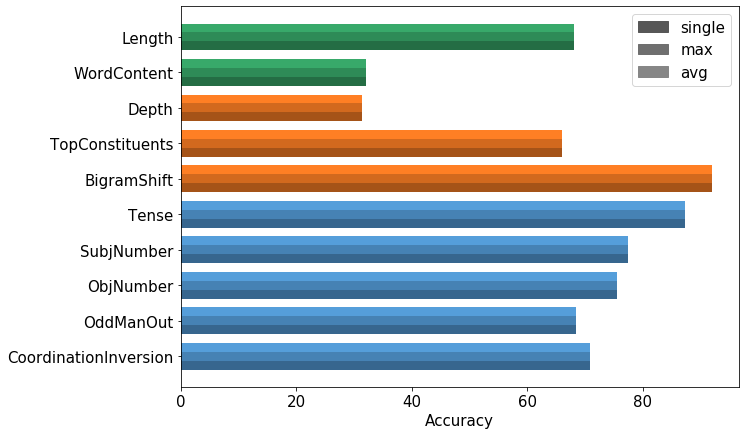

In [75]:
fig = plt.figure(figsize=(10, 7))
ax = plt.gca()
w = 1.2
for i, strategy in enumerate(strategies):
    ys = np.arange(0, T*4*w, w*4) + i*w
    colour_modifier = 1 + (i - 1)/4.7
    colours = [task_type_colours[task_type_codes[get_task_type(task)]]*colour_modifier for task in task_names]
    ax.barh(ys, vals_to_plot[strategy][::-1], height=w, align="edge", label=strategy, color=colours[::-1])
ax.set_yticks(np.arange(0, T*4*w, w*4) + 3*w/2)
ax.set_yticklabels(task_names[::-1])
ax.set_xlabel("Accuracy")
plt.legend()
leg = ax.get_legend()
cl = colour_to_bw(np.mean(task_type_colours, axis=0))
for i, (lh, s) in enumerate(zip(leg.legendHandles, strategies)):
    colour_modifier = 1 + (i - 1)/4.7
    lh.set_color(cl*colour_modifier)
plt.show()